## Task: Prediction using Decision Tree algorithm

### Context:Creating a decision tree model and visualizing it graphically. If we feed any new data to this classifier,it would be able to predict the right class accordingly.

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.
Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
The logic behind the decision tree can be easily understood because it shows a tree-like structure.


### Importing  necessary libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

### loading file into workspace

In [33]:
df=pd.read_csv("Iris.csv")

In [34]:
df.drop("Id",axis="columns",inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Checking some statistical condition

In [35]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df.shape

(150, 5)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### thankfully,there is no null value in our dataset.

In [39]:
print("There are",df['Species'].value_counts()["Iris-setosa"],"setosa")

There are 50 setosa


In [40]:
print("There are",df['Species'].value_counts()["Iris-versicolor"],"versicolor")

There are 50 versicolor


In [41]:
print("There are", df['Species'].value_counts()["Iris-virginica"],"virginica")

There are 50 virginica


In [42]:
pwarr=df["PetalWidthCm"].unique()
print("There are",len(pwarr),"unique petalwidth values.")

plarr=df["PetalLengthCm"].unique()
print("There are",len(plarr),"unique petallenght values.")

swarr=df["SepalWidthCm"].unique()
print("There are",len(swarr),"unique sepalwidth values.")

slarr=df["SepalLengthCm"].unique()
print("There are",len(slarr),"unique sepallength values.")

There are 22 unique petalwidth values.
There are 43 unique petallenght values.
There are 23 unique sepalwidth values.
There are 35 unique sepallength values.


### So there are more variation in petal length compare to others. 

In [43]:
df["PetalLengthCm"].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [44]:
df["SepalLengthCm"].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [45]:
df["SepalWidthCm"].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

### Exploratory Data Analysis

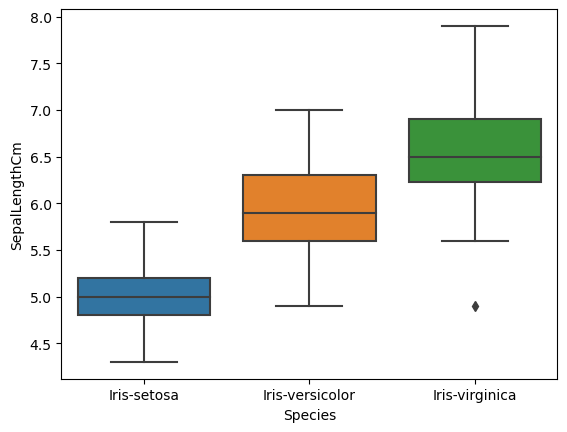

In [46]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df);

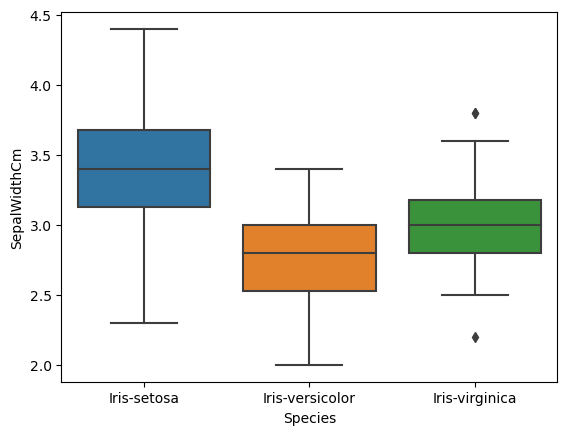

In [47]:
sns.boxplot(x="Species",y="SepalWidthCm",data=df);

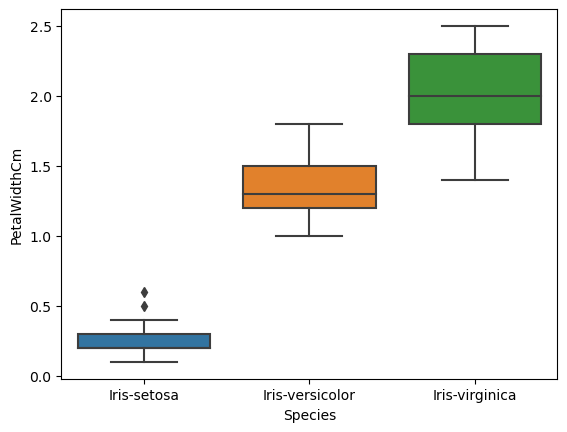

In [48]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df);

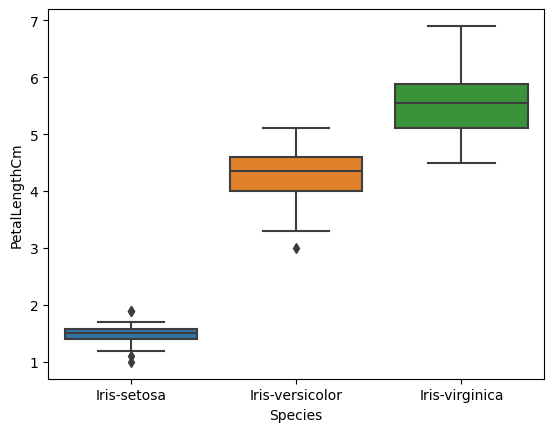

In [49]:
sns.boxplot(x="Species",y="PetalLengthCm",data=df);

### Andrew Curve for iris dataset

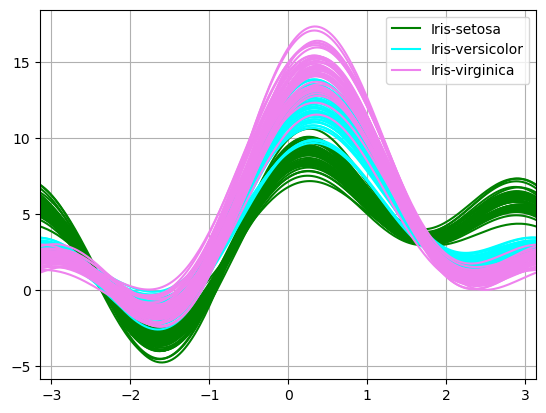

In [50]:
pd.plotting.andrews_curves(df, 'Species',color=["green","aqua","Violet"]);

#### from above visualization,we could see that one of class curve,setosa curve,is distinct from the 
#### other two i.e virginica and versicolor curve.
#### There is considerable amount of overlapping  between the versicolor and virginica curves.
##### This suggest that iris data would not break down into three clusters nicley there will be an error if we do so.
#### Virginica and versicolor sharing some similarities in their attributes while satosa does not as we could see 
#### curve taking a different path.

####  Correlation Plot

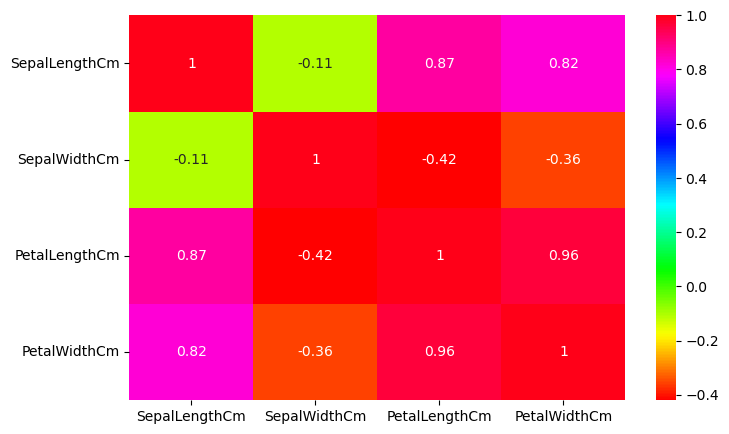

In [51]:
import seaborn as sns
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap="hsv")
plt.show()

### From above heatmap,we can conclude that:
    PetalLength,PetalWidth,SepalLength shows negative correlation with SepalWidth whereas,rest are
    showing normal correlation with each other.
    PetalLength and PetalWidth are show high positive correlation

Text(0.5, 0.92, 'simple 3D scatter plot')

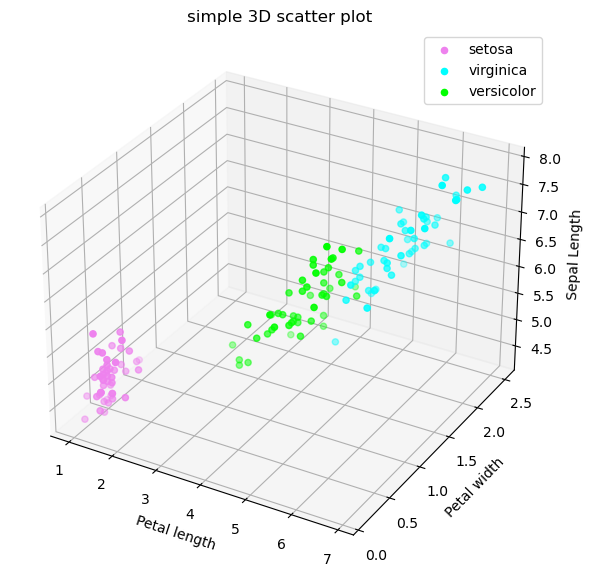

In [52]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(df1["PetalLengthCm"], df1["PetalWidthCm"], df1["SepalLengthCm"], color = "violet",label="setosa")
ax.scatter3D(df2["PetalLengthCm"], df2["PetalWidthCm"], df2["SepalLengthCm"], color = "aqua",label="virginica")
ax.scatter3D(df3["PetalLengthCm"], df3["PetalWidthCm"], df3["SepalLengthCm"], color = "lime",label="versicolor")
ax.set_xlabel("Petal length")
ax.set_ylabel("Petal width")
ax.set_zlabel("Sepal Length")
plt.legend()
plt.title("simple 3D scatter plot")
 

### setosa have lowest petal length,width and sepal length among all.versicolor seems to come in between setosa and verginica.
### Virginica have the highest petal dimensions as well as high sepal length.veriscolor and 
### virginica both share some range of petal length between ~4.4 to ~5.2  as well as petal width  between ~1.3 to ~1.9.whereas all three shares sepal length of  range between 4.8 to 7.1cm

### Distribution Graph 

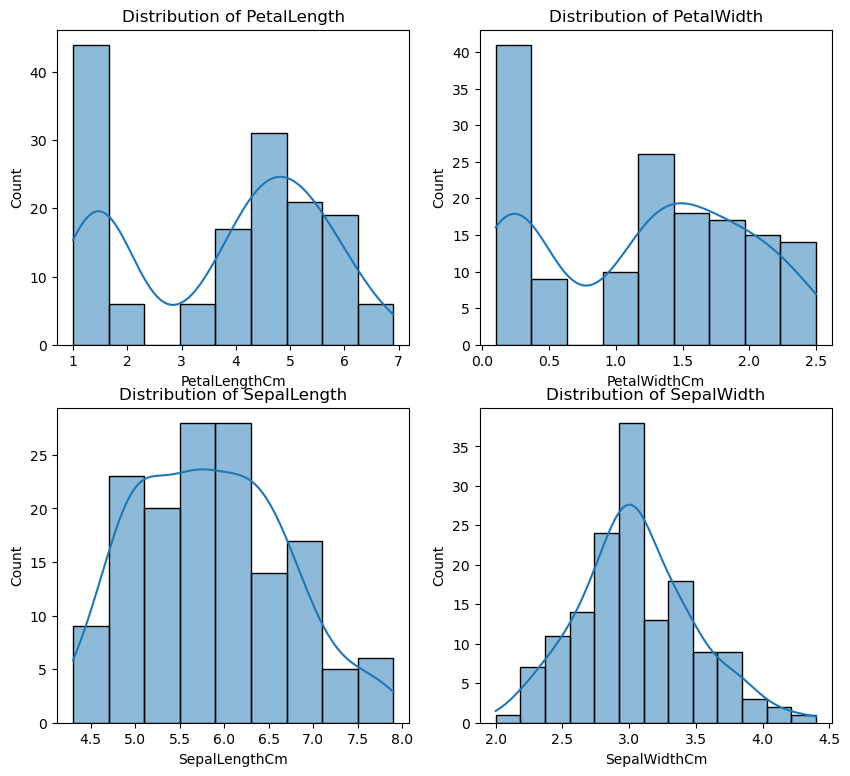

In [53]:

fig, ax = plt.subplots(2, 2, figsize=(10, 9))

sns.histplot(ax=ax[0,0],data=df["PetalLengthCm"],kde=True)
ax[0,0].set_title("Distribution of PetalLength")

sns.histplot(ax=ax[0,1],data=df["PetalWidthCm"],kde=True)
ax[0,1].set_title("Distribution of PetalWidth")


sns.histplot(ax=ax[1,0],data=df["SepalLengthCm"],kde=True)
ax[1,0].set_title("Distribution of SepalLength")

sns.histplot(ax=ax[1,1],data=df["SepalWidthCm"],kde=True)
ax[1,1].set_title("Distribution of SepalWidth")

plt.show()

### From above distribution analysis we could say that expect for Sepal Width, all other attribute showing a difference distribution patterns.
### Distribution of sepal width shows a sharp increase then decrease i.e normal distribution whereas Sepal length is right skewed.
### Petal length and petal width shows a wave like pattern distribution.

### Species distribution pie chart 

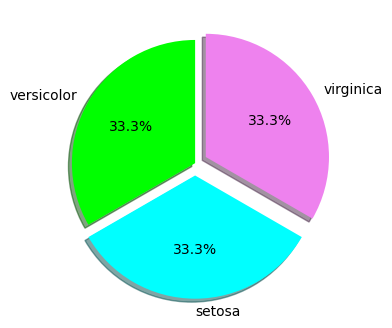

In [54]:
fig = plt.figure(figsize = (7, 4))
explode = (0, 0.1, 0.1)
ax=plt.pie(np.array([df['Species'].value_counts()["Iris-versicolor"],df['Species'].value_counts()["Iris-setosa"],df['Species'].value_counts()["Iris-virginica"]]),
           autopct='%1.1f%%',
           shadow=True, 
           startangle=90,
           labels=["versicolor","setosa","virginica"],
           explode=explode,
           colors=["lime",'aqua','violet']
          )
plt.show()

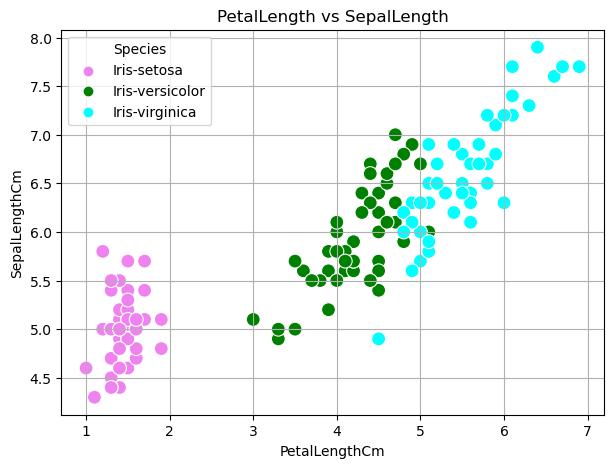

In [56]:
plt.figure(figsize=(7, 5))
plt.title('PetalLength vs SepalLength')

sns.scatterplot(x=df["PetalLengthCm"], 
                y=df["SepalLengthCm"], 
                hue=df["Species"],palette = ["violet","green","aqua"],
                s=100)
plt.grid()

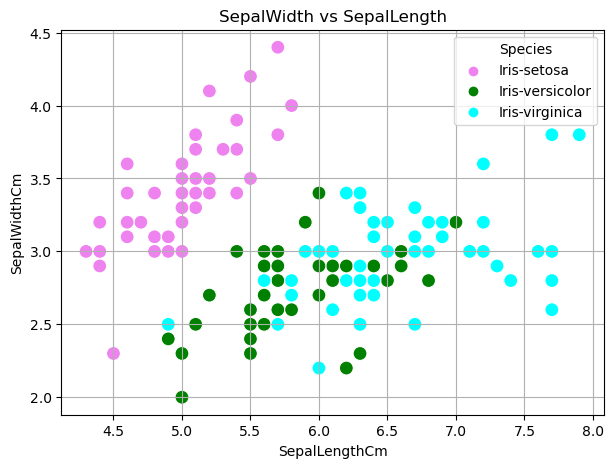

In [57]:
plt.figure(figsize=(7, 5))
plt.title('SepalWidth vs SepalLength')

sns.scatterplot(x=df["SepalLengthCm"], 
                y=df["SepalWidthCm"], 
                hue=df["Species"],palette = ["violet","green","aqua"],
                s=100)
plt.grid()

### Since,we know that machine learning algorithm does not quite understand the language that we speak meaning it  only validate the numbers so,we have to encode these value into numbers.

## Data Preparation for our Decision Tree Classifier

### Encoding calss

In [58]:
species_encoder=LabelEncoder()
## created new column which stores encoded values
df["Species_en"]=species_encoder.fit_transform(df["Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_en
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


### Train Test model 

##### Splitting dataset into Train  and Test dataset

In [59]:
train,test=train_test_split(df,test_size=0.2)

### test_size is 0.2 which indicates that the data split happen to be some where 80/20.
### This means we use 80% of the observations(we have 150 observation means 80% of 150 i.e 120 observation or rows) for training and the rest i.e 20% (Similarly,20% of 150 i.e 30 observations or rows)for testing.
### Splitting is purely a arbitrary procedure.

In [60]:
train.shape,test.shape

((120, 6), (30, 6))

In [61]:
## train dataset
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_en
146,6.3,2.5,5.0,1.9,Iris-virginica,2
90,5.5,2.6,4.4,1.2,Iris-versicolor,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0
66,5.6,3.0,4.5,1.5,Iris-versicolor,1
131,7.9,3.8,6.4,2.0,Iris-virginica,2
...,...,...,...,...,...,...
14,5.8,4.0,1.2,0.2,Iris-setosa,0
37,4.9,3.1,1.5,0.1,Iris-setosa,0
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
92,5.8,2.6,4.0,1.2,Iris-versicolor,1


In [62]:
## test dataset
test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_en
2,4.7,3.2,1.3,0.2,Iris-setosa,0
110,6.5,3.2,5.1,2.0,Iris-virginica,2
45,4.8,3.0,1.4,0.3,Iris-setosa,0
139,6.9,3.1,5.4,2.1,Iris-virginica,2
4,5.0,3.6,1.4,0.2,Iris-setosa,0
141,6.9,3.1,5.1,2.3,Iris-virginica,2
7,5.0,3.4,1.5,0.2,Iris-setosa,0
124,6.7,3.3,5.7,2.1,Iris-virginica,2
72,6.3,2.5,4.9,1.5,Iris-versicolor,1
71,6.1,2.8,4.0,1.3,Iris-versicolor,1


In [63]:
## preparing train's parameters
train_y=train.Species_en
train_x=train.drop(["Species","Species_en"],axis="columns")

## similarly,preparing test's parameter
test_y=test.Species_en
test_x=test.drop(["Species","Species_en"],axis="columns")

### Checking the accuracy of model
### 1. Training Model
### we'll train our model with given train dataset i.e train_x and train_y.
### 2.Testing Model
### once trainig the model finished or completed we'll then proceed to testing the model with the given test dataset i.e test_x and test_y.Using sklearn.metrics module to measure the accuracy of classification.

In [64]:

clf=DecisionTreeClassifier()
## training model 
clf.fit(train_x,train_y)
## testing model
prediction_result=clf.predict(test_x)
print("The test accuracy of a Decision tree model:", metrics.accuracy_score(prediction_result,test_y) *100,"%")


The test accuracy of a Decision tree model: 93.33333333333333 %


####  preparing my input data and target for our classifier

In [65]:
targets=df["Species_en"]
print(targets)
data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_en, Length: 150, dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### fitting entire data in decision tree

In [66]:
## creating Decision tree classifier
clf_iris=DecisionTreeClassifier()
clf_iris.fit(data.values,targets.values)

## predicting 
predicted_species=clf_iris.predict([[5.9,3.0,5.1,1.8]])
print(species_encoder.inverse_transform(predicted_species))
print("Decision Tree classifier is working!")

['Iris-virginica']
Decision Tree classifier is working!


### Visualizing decisions tree classifier

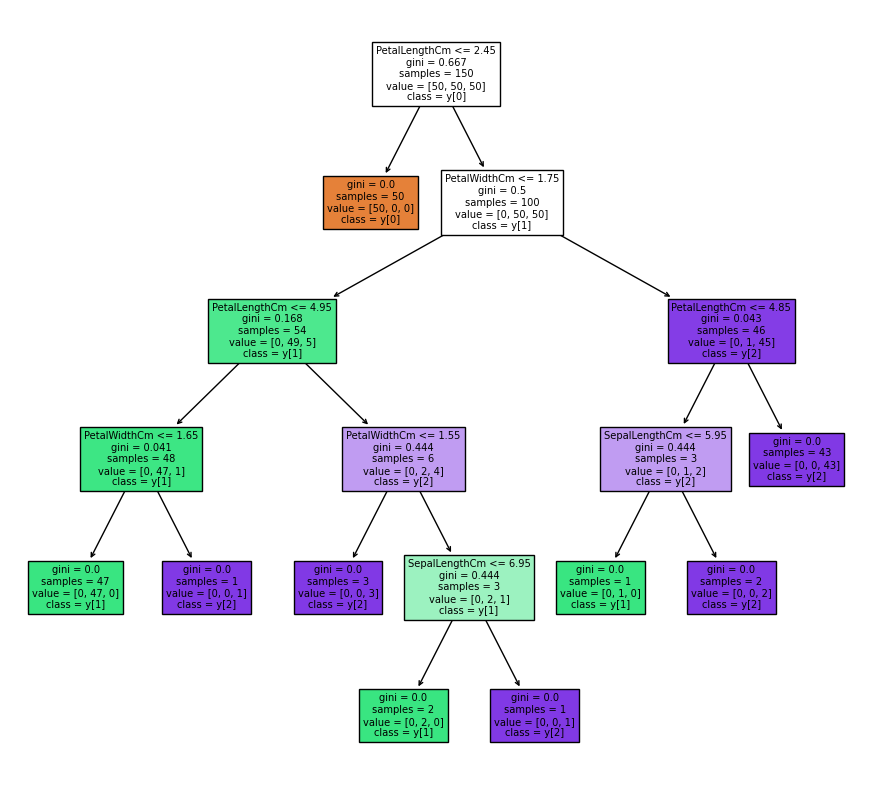

In [67]:
from sklearn import tree
fig=plt.figure(figsize=(11,10))
_=tree.plot_tree(clf_iris, 
                   feature_names=data.columns,  
                   filled=True,
                class_names=True)

In [68]:
print(tree.export_text(clf_iris))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

